In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Apple = yf.download("AAPL", start="2010-01-01", end="2021-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
Apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490198,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.679749,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317856,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529388,121047300


In [4]:
ticker = ["SPY","AAPL","KO"]

In [5]:
stocks = yf.download(ticker, start="2010-01-01", end="2021-01-01")

[*********************100%%**********************]  3 of 3 completed


In [6]:
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.478998  18.645306   87.483192    7.643214  28.520000   
2010-01-05    6.490201  18.419764   87.714806    7.656429  28.174999   
2010-01-06    6.386963  18.413227   87.776535    7.534643  28.165001   
2010-01-07    6.375156  18.367456   88.147079    7.520714  28.094999   
2010-01-08    6.417541  18.027502   88.440392    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.455585  359.085938  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [7]:
stocks.info

<bound method DataFrame.info of              Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.478998  18.645306   87.483192    7.643214  28.520000   
2010-01-05    6.490201  18.419764   87.714806    7.656429  28.174999   
2010-01-06    6.386963  18.413227   87.776535    7.534643  28.165001   
2010-01-07    6.375156  18.367456   88.147079    7.520714  28.094999   
2010-01-08    6.417541  18.027502   88.440392    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.45558

In [8]:
stocks.head()

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.478998  18.645306  87.483192  7.643214  28.520000  113.330002   
2010-01-05  6.490201  18.419764  87.714806  7.656429  28.174999  113.629997   
2010-01-06  6.386963  18.413227  87.776535  7.534643  28.165001  113.709999   
2010-01-07  6.375156  18.367456  88.147079  7.520714  28.094999  114.190002   
2010-01-08  6.417541  18.027502  88.440392  7.570714  27.575001  114.570000   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [9]:
stocks.tail()

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.455585  359.085938  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                     
                 AAPL       KO       SPY  
Date                                      
2020-12-24   54930100  3265500  26457900  
2020-12-28  124486200  9020500  39000400  
2020-12-29  121047300  8320600  53680500  
2020-12-30   96452100  8142700  49455300  
2020-12-31   99116600  8495000  78520700

In [10]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2769 non-null   float64
 1   (Adj Close, KO)    2769 non-null   float64
 2   (Adj Close, SPY)   2769 non-null   float64
 3   (Close, AAPL)      2769 non-null   float64
 4   (Close, KO)        2769 non-null   float64
 5   (Close, SPY)       2769 non-null   float64
 6   (High, AAPL)       2769 non-null   float64
 7   (High, KO)         2769 non-null   float64
 8   (High, SPY)        2769 non-null   float64
 9   (Low, AAPL)        2769 non-null   float64
 10  (Low, KO)          2769 non-null   float64
 11  (Low, SPY)         2769 non-null   float64
 12  (Open, AAPL)       2769 non-null   float64
 13  (Open, KO)         2769 non-null   float64
 14  (Open, SPY)        2769 non-null   float64
 15  (Volume, AAPL)     2769 non-null   int64  
 16  (Volum

In [11]:
stocks.to_csv("stocks_algo_data.csv")

In [12]:
stocks = pd.read_csv("stocks_algo_data.csv")

In [13]:
stocks

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaN,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.478997707366943,18.645305633544922,87.48319244384766,7.643214225769043,28.520000457763672,113.33000183105469,7.660714149475098,28.610000610351562,113.38999938964844,7.585000038146973,28.450000762939453,111.51000213623047,7.622499942779541,28.579999923706055,112.37000274658203,493729600,13870400,118944600
3,2010-01-05,6.490200996398926,18.419763565063477,87.71480560302734,7.656428813934326,28.174999237060547,113.62999725341797,7.699643135070801,28.4950008392334,113.68000030517578,7.6160712242126465,28.06999969482422,112.8499984741211,7.664286136627197,28.424999237060547,113.26000213623047,601904800,23172400,111579900
4,2010-01-06,6.386963367462158,18.413227081298828,87.77653503417969,7.534643173217773,28.165000915527344,113.70999908447266,7.68678617477417,28.219999313354492,113.98999786376953,7.526785850524902,27.989999771118164,113.43000030517578,7.656428813934326,28.174999237060547,113.5199966430664,552160000,19264600,116074400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2020-12-24,129.67971801757812,49.16751480102539,354.3990783691406,131.97000122070312,53.439998626708984,369.0,133.4600067138672,53.54999923706055,369.0299987792969,131.10000610351562,53.02000045776367,367.45001220703125,131.32000732421875,53.02000045776367,368.0799865722656,54930100,3265500,26457900
2767,2020-12-28,134.31781005859375,49.8299560546875,357.44366455078125,136.69000244140625,54.15999984741211,372.1700134277344,137.33999633789062,54.439998626708984,372.5899963378906,133.50999450683594,53.72999954223633,371.07000732421875,133.99000549316406,53.849998474121094,371.739990234375,124486200,9020500,39000400
2768,2020-12-29,132.5293731689453,49.80234909057617,356.7617492675781,134.8699951171875,54.130001068115234,371.4599914550781,138.7899932861328,54.4900016784668,374.0,134.33999633789062,54.02000045776367,370.8299865722656,138.0500030517578,54.45000076293945,373.80999755859375,121047300,8320600,53680500
2769,2020-12-30,131.3993682861328,50.08757019042969,357.2707824707031,133.72000122070312,54.439998626708984,371.989990234375,135.99000549316406,54.630001068115234,373.1000061035156,133.39999389648438,54.029998779296875,371.57000732421875,135.5800018310547,54.04999923706055,372.3399963378906,96452100,8142700,49455300


In [14]:
stocks = pd.read_csv("stocks_algo_data.csv", header=[0,1])
stocks

Unnamed: 0_level_0   Adj Close                              Close  \
     Unnamed: 0_level_1        AAPL         KO         SPY        AAPL   
0                  Date         NaN        NaN         NaN         NaN   
1            2010-01-04    6.478998  18.645306   87.483192    7.643214   
2            2010-01-05    6.490201  18.419764   87.714806    7.656429   
3            2010-01-06    6.386963  18.413227   87.776535    7.534643   
4            2010-01-07    6.375156  18.367456   88.147079    7.520714   
...                 ...         ...        ...         ...         ...   
2765         2020-12-24  129.679718  49.167515  354.399078  131.970001   
2766         2020-12-28  134.317810  49.829956  357.443665  136.690002   
2767         2020-12-29  132.529373  49.802349  356.761749  134.869995   
2768         2020-12-30  131.399368  50.087570  357.270782  133.720001   
2769         2020-12-31  130.387268  50.455585  359.085938  132.690002   

                                   High                                Low  \
             KO         SPY        AAPL         KO         SPY        AAPL   
0           NaN         NaN         NaN        NaN         NaN         NaN   
1     28.520000  113.330002    7.660714  28.610001  113.389999    7.585000   
2     28.174999  113.629997    7.699643  28.495001  113.680000    7.616071   
3     28.165001  113.709999    7.686786  28.219999  113.989998    7.526786   
4     28.094999  114.190002    7.571429  28.184999  114.330002    7.466071   
...         ...         ...         ...        ...         ...         ...   
2765  53.439999  369.000000  133.460007  53.549999  369.029999  131.100006   
2766  54.160000  372.170013  137.339996  54.439999  372.589996  133.509995   
2767  54.130001  371.459991  138.789993  54.490002  374.000000  134.339996   
2768  54.439999  371.989990  135.990005  54.630001  373.100006  133.399994   
2769  54.840000  373.880005  134.740005  54.930000  374.660004  131.720001   

                                   Open                              Volume  \
             KO         SPY        AAPL         KO         SPY         AAPL   
0           NaN         NaN         NaN        NaN         NaN          NaN   
1     28.450001  111.510002    7.622500  28.580000  112.370003  493729600.0   
2     28.070000  112.849998    7.664286  28.424999  113.260002  601904800.0   
3     27.990000  113.430000    7.656429  28.174999  113.519997  552160000.0   
4     27.875000  113.180000    7.562500  28.165001  113.500000  477131200.0   
...         ...         ...         ...        ...         ...          ...   
2765  53.020000  367.450012  131.320007  53.020000  368.079987   54930100.0   
2766  53.730000  371.070007  133.990005  53.849998  371.739990  124486200.0   
2767  54.020000  370.829987  138.050003  54.450001  373.809998  121047300.0   
2768  54.029999  371.570007  135.580002  54.049999  372.339996   96452100.0   
2769  54.270000  371.230011  134.080002  54.450001  371.779999   99116600.0   

                               
              KO          SPY  
0            NaN          NaN  
1     13870400.0  118944600.0  
2     23172400.0  111579900.0  
3     19264600.0  116074400.0  
4     13234600.0  131091100.0  
...          ...          ...  
2765   3265500.0   26457900.0  
2766   9020500.0   39000400.0  
2767   8320600.0   53680500.0  
2768   8142700.0   49455300.0  
2769   8495000.0   78520700.0  

[2770 rows x 19 columns]

In [15]:
stocks = pd.read_csv("stocks_algo_data.csv", header=[0,1],index_col=[0])
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.478998  18.645306   87.483192    7.643214  28.520000   
2010-01-05    6.490201  18.419764   87.714806    7.656429  28.174999   
2010-01-06    6.386963  18.413227   87.776535    7.534643  28.165001   
2010-01-07    6.375156  18.367456   88.147079    7.520714  28.094999   
2010-01-08    6.417541  18.027502   88.440392    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.455585  359.085938  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [16]:
stocks = pd.read_csv("stocks_algo_data.csv", header=[0,1],index_col=[0],parse_dates=[0])
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.478998  18.645306   87.483192    7.643214  28.520000   
2010-01-05    6.490201  18.419764   87.714806    7.656429  28.174999   
2010-01-06    6.386963  18.413227   87.776535    7.534643  28.165001   
2010-01-07    6.375156  18.367456   88.147079    7.520714  28.094999   
2010-01-08    6.417541  18.027502   88.440392    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.455585  359.085938  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [17]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           )

In [18]:
#convert mult index to one tuple
stocks.columns = stocks.columns.to_flat_index()

In [19]:
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [20]:
stocks

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.478998,18.645306,87.483192,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.490201,18.419764,87.714806,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.386963,18.413227,87.776535,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400
2010-01-07,6.375156,18.367456,88.147079,7.520714,28.094999,114.190002,7.571429,28.184999,114.330002,7.466071,27.875000,113.180000,7.562500,28.165001,113.500000,477131200,13234600,131091100
2010-01-08,6.417541,18.027502,88.440392,7.570714,27.575001,114.570000,7.571429,27.820000,114.620003,7.466429,27.375000,113.660004,7.510714,27.730000,113.889999,447610800,28712400,126402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,129.679718,49.167515,354.399078,131.970001,53.439999,369.000000,133.460007,53.549999,369.029999,131.100006,53.020000,367.450012,131.320007,53.020000,368.079987,54930100,3265500,26457900
2020-12-28,134.317810,49.829956,357.443665,136.690002,54.160000,372.170013,137.339996,54.439999,372.589996,133.509995,53.730000,371.070007,133.990005,53.849998,371.739990,124486200,9020500,39000400
2020-12-29,132.529373,49.802349,356.761749,134.869995,54.130001,371.459991,138.789993,54.490002,374.000000,134.339996,54.020000,370.829987,138.050003,54.450001,373.809998,121047300,8320600,53680500


In [21]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.478998  18.645306   87.483192    7.643214  28.520000   
2010-01-05    6.490201  18.419764   87.714806    7.656429  28.174999   
2010-01-06    6.386963  18.413227   87.776535    7.534643  28.165001   
2010-01-07    6.375156  18.367456   88.147079    7.520714  28.094999   
2010-01-08    6.417541  18.027502   88.440392    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.679718  49.167515  354.399078  131.970001  53.439999   
2020-12-28  134.317810  49.829956  357.443665  136.690002  54.160000   
2020-12-29  132.529373  49.802349  356.761749  134.869995  54.130001   
2020-12-30  131.399368  50.087570  357.270782  133.720001  54.439999   
2020-12-31  130.387268  50.455585  359.085938  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [22]:
stocks.describe()

Adj Close                                  Close               \
              AAPL           KO          SPY         AAPL           KO   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     31.562566    32.465223   182.790482    33.777537    41.320121   
std      24.614793     8.248888    69.986182    24.572747     6.808527   
min       5.814176    16.504198    79.593353     6.858929    25.014999   
25%      15.201317    26.817389   115.347000    17.484285    37.660000   
50%      24.549248    32.021870   176.694580    26.987499    41.759998   
75%      40.931625    37.928131   242.913635    43.007500    45.549999   
max     134.317810    53.492123   359.085938   136.690002    60.130001   

                           High                                    Low  \
               SPY         AAPL           KO          SPY         AAPL   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean    207.676797    34.114230    41.583236   208.716963    33.413543   
std      67.240791    24.895185     6.864731    67.589965    24.220789   
min     102.199997     7.000000    25.150000   103.419998     6.794643   
25%     141.559998    17.695356    37.919998   142.100006    17.333929   
50%     205.210007    27.225000    41.980000   206.190002    26.705000   
75%     265.339996    43.367500    45.799999   267.320007    42.605000   
max     373.880005   138.789993    60.130001   378.459991   134.339996   

                                        Open                            \
                KO          SPY         AAPL           KO          SPY   
count  2769.000000  2769.000000  2769.000000  2769.000000  2769.000000   
mean     41.042551   206.475522    33.764375    41.314411   207.648136   
std       6.755616    66.883703    24.561595     6.807492    67.258092   
min      24.735001   101.129997     6.870357    25.110001   103.110001   
25%      37.419998   140.929993    17.518213    37.700001   141.660004   
50%      41.529999   204.110001    26.975000    41.750000   204.960007   
75%      45.310001   263.390015    43.012501    45.549999   265.779999   
max      59.619999   371.570007   138.050003    59.810001   373.809998   

             Volume                              
               AAPL            KO           SPY  
count  2.769000e+03  2.769000e+03  2.769000e+03  
mean   2.866162e+08  1.502133e+07  1.244573e+08  
std    2.289459e+08  6.716946e+06  7.477756e+07  
min    4.544800e+07  2.996300e+06  2.027000e+07  
25%    1.211120e+08  1.071810e+07  7.292670e+07  
50%    2.029972e+08  1.350830e+07  1.045961e+08  
75%    3.890376e+08  1.751480e+07  1.539926e+08  
max    1.880998e+09  9.896750e+07  7.178287e+08

In [23]:
stocks.loc[:,"Close"]

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24,131.970001,53.439999,369.000000
2020-12-28,136.690002,54.160000,372.170013
2020-12-29,134.869995,54.130001,371.459991


In [24]:
close = stocks.loc[:,"Close"].copy()
close

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24,131.970001,53.439999,369.000000
2020-12-28,136.690002,54.160000,372.170013
2020-12-29,134.869995,54.130001,371.459991


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')


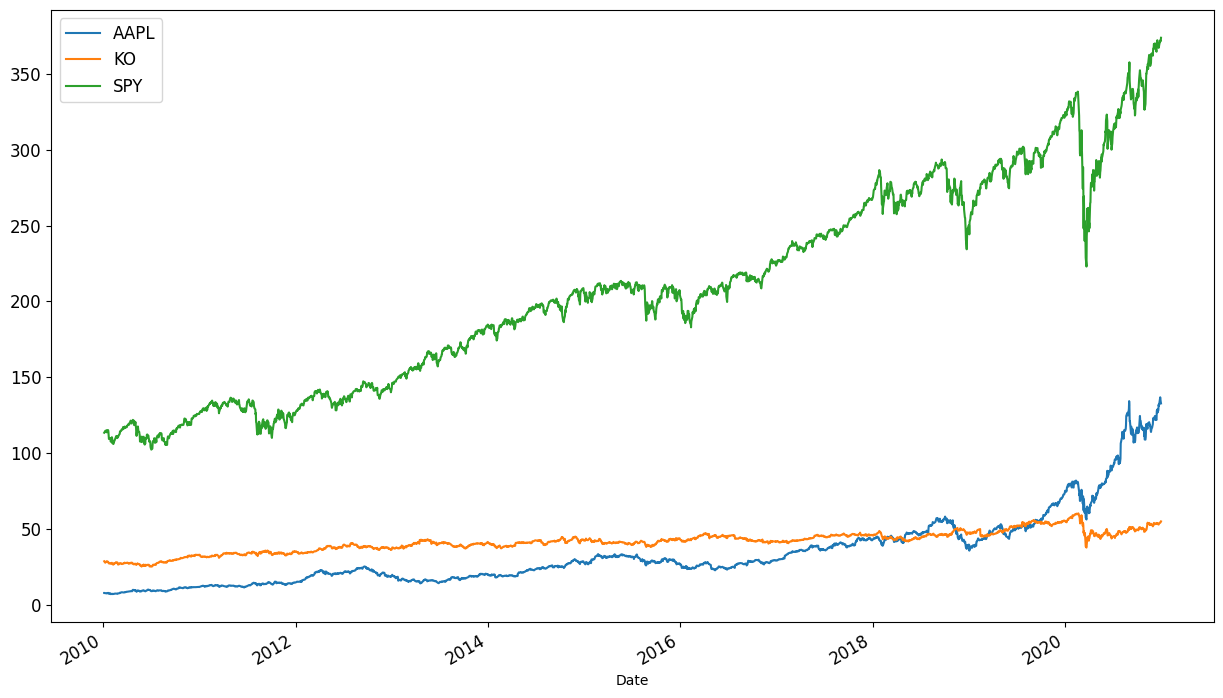

In [26]:
close.plot(figsize=(15,9), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [27]:
close.iloc[0,0]

7.643214225769043

In [28]:
close.AAPL

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: AAPL, Length: 2769, dtype: float64

In [29]:
close.AAPL.div(close.iloc[0,0])

Date
2010-01-04     1.000000
2010-01-05     1.001729
2010-01-06     0.985795
2010-01-07     0.983973
2010-01-08     0.990514
                ...    
2020-12-24    17.266296
2020-12-28    17.883838
2020-12-29    17.645717
2020-12-30    17.495258
2020-12-31    17.360498
Name: AAPL, Length: 2769, dtype: float64

In [30]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2010-01-04     100.000000
2010-01-05     100.172893
2010-01-06      98.579511
2010-01-07      98.397266
2010-01-08      99.051443
                 ...     
2020-12-24    1726.629626
2020-12-28    1788.383766
2020-12-29    1764.571699
2020-12-30    1749.525753
2020-12-31    1736.049763
Name: AAPL, Length: 2769, dtype: float64

In [31]:
close.iloc[0]

AAPL      7.643214
KO       28.520000
SPY     113.330002
Name: 2010-01-04 00:00:00, dtype: float64

In [32]:
close.div(close.iloc[0]).mul(100)

,AAPL,KO,SPY
Date,,,
2010-01-04,100.000000,100.000000,100.000000
2010-01-05,100.172893,98.790318,100.264710
2010-01-06,98.579511,98.755261,100.335302
2010-01-07,98.397266,98.509814,100.758846
2010-01-08,99.051443,96.686537,101.094148
...,...,...,...
2020-12-24,1726.629626,187.377271,325.597806
2020-12-28,1788.383766,189.901820,328.394959
2020-12-29,1764.571699,189.796635,327.768451


In [33]:
normclose = close.div(close.iloc[0]).mul(100)

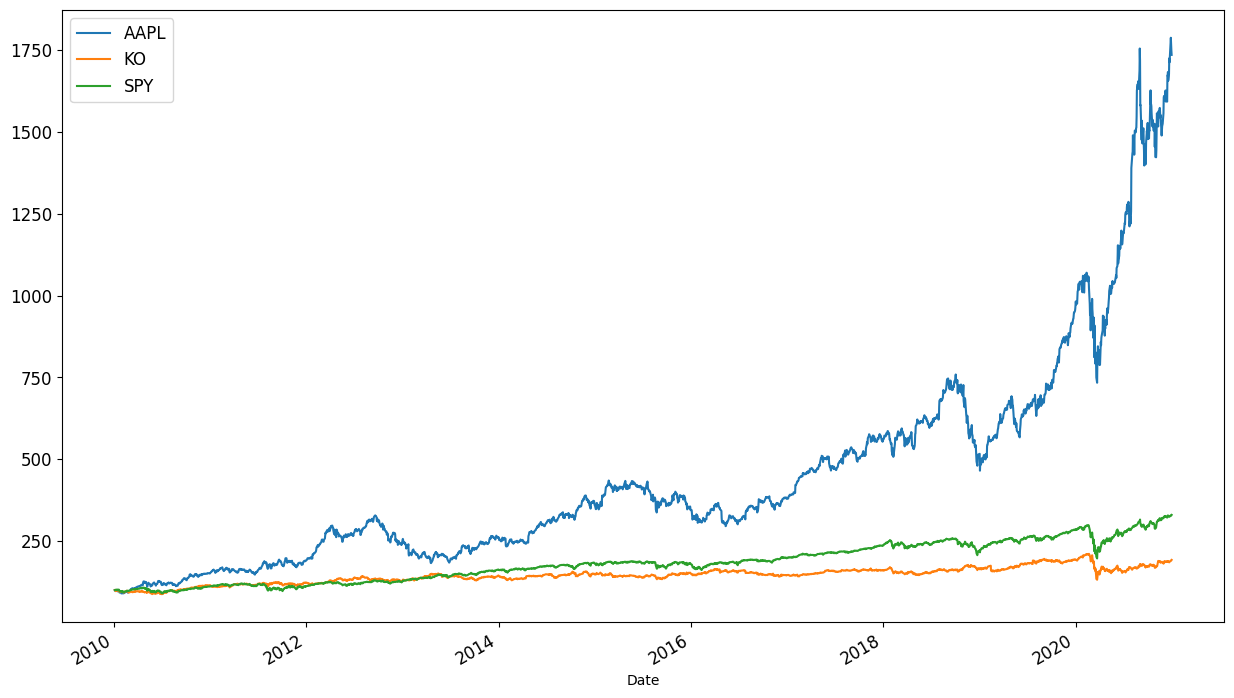

In [34]:
normclose.plot(figsize=(15,9), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [35]:
aapl = close.AAPL.copy().to_frame()

In [36]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [37]:
# aapl.shift(periods=1)

In [38]:
# aapl["lag1"] = aapl.shift(periods=1)
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [39]:
# aapl["Diff"]=aapl.AAPL.sub(aapl.lag1)
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [40]:
# aapl["% change"]=aapl.AAPL.div(aapl.lag1).sub(1).mul(100)
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [41]:
# aapl["Diff2"] = aapl.AAPL.diff(periods=1)
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [42]:
# aapl["% change2"]=aapl.AAPL.pct_change(periods=1).mul(100)


In [43]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [44]:
# del aapl["Diff"]

In [45]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [46]:
# aapl.rename(columns={"% change":"Change"},inplace=True)

In [47]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [48]:
aapl.AAPL.resample("M").last()

Date
2010-01-31      6.859286
2010-02-28      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-31    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
Freq: M, Name: AAPL, Length: 132, dtype: float64

In [49]:
aapl.AAPL.resample("BM").last()

Date
2010-01-29      6.859286
2010-02-26      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-30    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
Freq: BM, Name: AAPL, Length: 132, dtype: float64

In [50]:
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2020-08-31    21.437974
2020-09-30   -10.252632
2020-10-30    -6.001206
2020-11-30     9.360649
2020-12-31    11.457370
Freq: BM, Name: AAPL, Length: 132, dtype: float64

In [51]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [52]:
#del aapl["Change"]

In [53]:
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [54]:
ret = aapl.pct_change().dropna()
ret

,AAPL
Date,
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
2010-01-11,-0.008821
...,...
2020-12-24,0.007712
2020-12-28,0.035766
2020-12-29,-0.013315


In [55]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2010-01-05 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2768 non-null   float64
dtypes: float64(1)
memory usage: 43.2 KB


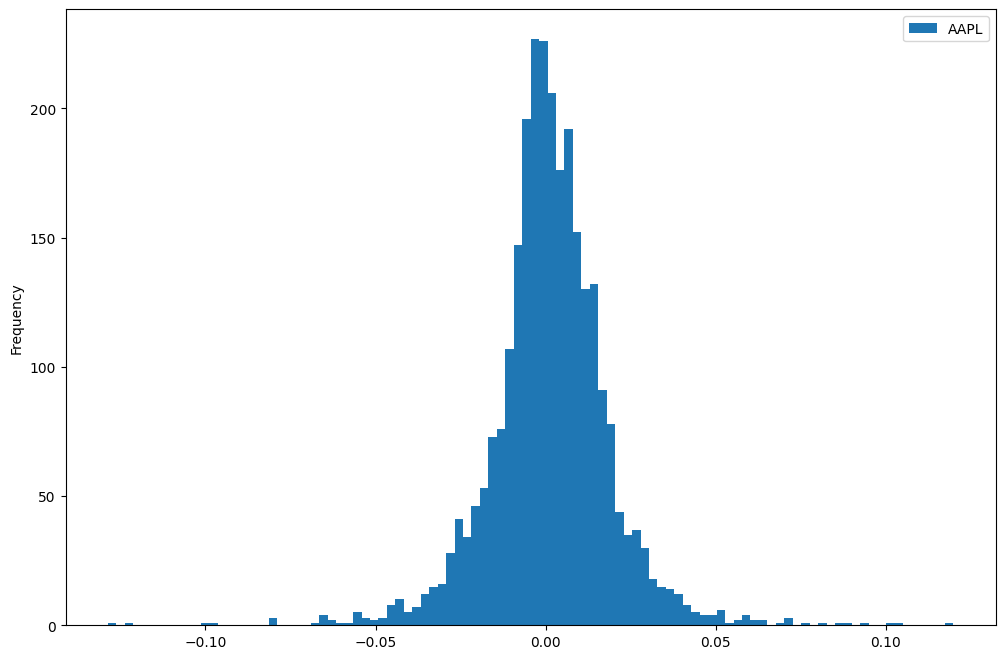

In [56]:
ret.plot(kind="hist",figsize=(12,8),bins=100)
plt.show()

In [57]:
daily_mean_return = ret.mean()
daily_mean_return

AAPL    0.001191
dtype: float64

In [58]:
var_daily = ret.var()
var_daily

AAPL    0.000318
dtype: float64

In [59]:
std_daily =np.sqrt(var_daily)

In [60]:
std_daily

AAPL    0.017843
dtype: float64

In [61]:
ret.std()

AAPL    0.017843
dtype: float64

In [62]:
annual_mean_return = daily_mean_return * 252
annual_mean_return

AAPL    0.300134
dtype: float64

In [63]:
annual_var_return = var_daily * 252
annual_var_return

AAPL    0.080226
dtype: float64

In [64]:
annaul_std_return = np.sqrt(annual_var_return)
annaul_std_return

AAPL    0.283242
dtype: float64

In [65]:
ret.std()*np.sqrt(252)

AAPL    0.283242
dtype: float64

In [66]:
ticker = ["SPY","AAPL","KO","IBM","DIS","MSFT"]

In [67]:
stocks = yf.download(ticker, start="2010-01-01", end="2021-01-01")

[*********************100%%**********************]  6 of 6 completed


In [68]:
close = stocks.loc[:,"Close"].copy()

In [69]:
normclose = close.div(close.iloc[0]).mul(100)

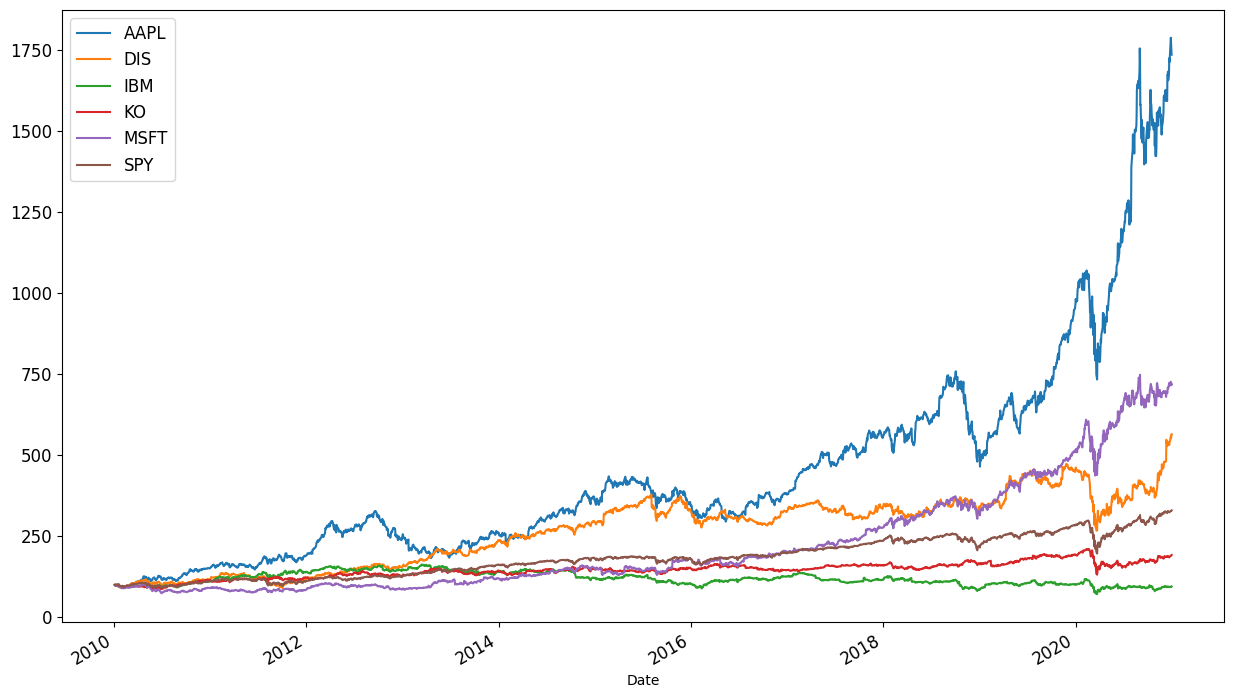

In [70]:
normclose.plot(figsize=(15,9), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [71]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [72]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [73]:
summary = ret.describe().T.loc[:,["mean","std"]]
summary

,mean,std
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [74]:
summary["mean"] = summary["mean"] * 252
summary["std"] = summary["std"] * np.sqrt(252)
summary

,mean,std
AAPL,0.300134,0.283242
DIS,0.188696,0.249504
IBM,0.020648,0.224345
KO,0.075091,0.176009
MSFT,0.211915,0.254185
SPY,0.123754,0.173170


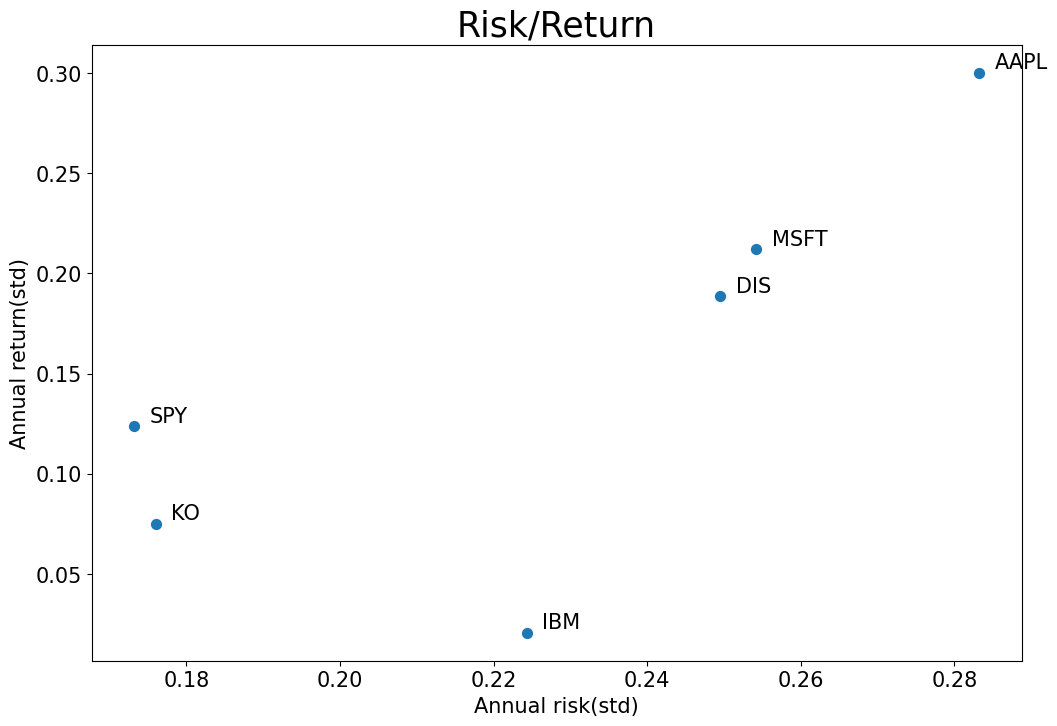

In [75]:
summary.plot.scatter(x="std",y="mean",figsize=(12,8), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual risk(std)",fontsize=15)
plt.ylabel("Annual return(std)",fontsize=15)
plt.title("Risk/Return",fontsize=25)
plt.show()

##Correlation and Covariance

In [76]:
ret

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [77]:
ret.cov()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,0.000318,0.000115,0.000110,0.000067,0.000158,0.000128
DIS,0.000115,0.000247,0.000111,0.000085,0.000121,0.000121
IBM,0.000110,0.000111,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000085,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000121,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000121,0.000108,0.000077,0.000130,0.000119


In [78]:
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.408513,0.436100,0.339213,0.554051,0.659557
DIS,0.408513,1.000000,0.497775,0.486514,0.480457,0.706726
IBM,0.436100,0.497775,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.486514,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.480457,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.706726,0.703342,0.639324,0.744601,1.000000


In [79]:
import seaborn as sns

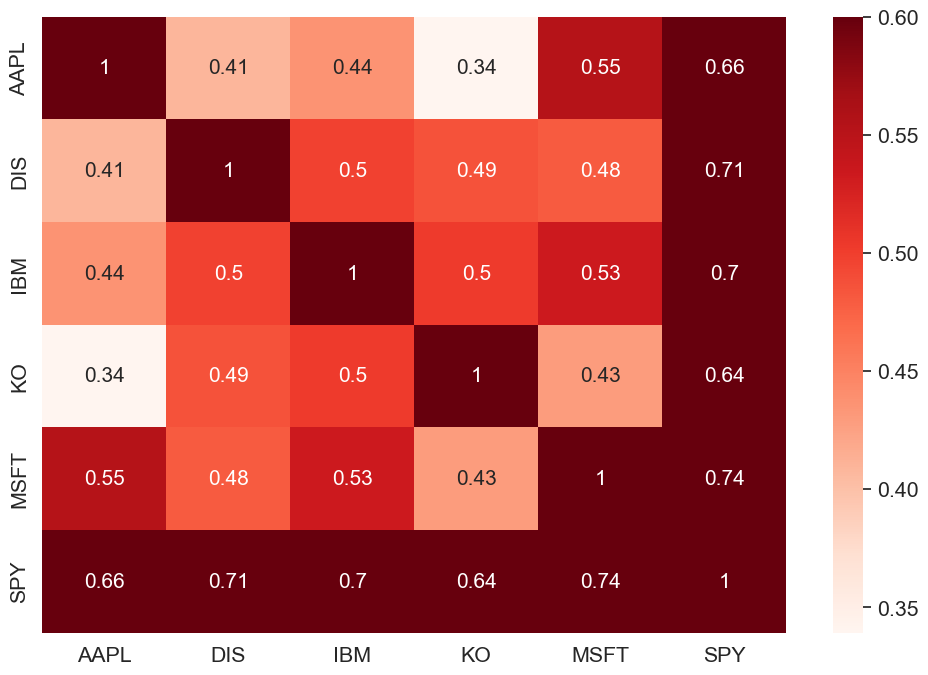

In [80]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), annot=True, cmap="Reds",  annot_kws={"size": 15}, vmax=0.6)
plt.show()

#Simple returns and log returns


In [81]:
df = pd.DataFrame(index=[2016,2017,2018],data=[100,50,95],columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [82]:
simplereturns = df.pct_change().dropna()

In [83]:
simplereturns

,Price
2017,-0.5
2018,0.9


In [84]:
simplereturns.mean()

Price    0.2
dtype: float64

In [85]:
100*1.2*1.2

144.0

In [86]:
#mean return are misleading as crazy

In [87]:
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [88]:
logreturns.mean()

Price   -0.025647
dtype: float64

In [89]:
100*np.exp(logreturns.mean()*2)

Price    95.0
dtype: float64

In [90]:
Apple = yf.download("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [91]:
SPY = yf.download("SPY")

[*********************100%%**********************]  1 of 1 completed


In [92]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941385,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118778,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172003,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438110,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544525,531500
...,...,...,...,...,...,...
2023-11-13,439.230011,441.329987,438.420013,440.190002,440.190002,52236100
2023-11-14,446.320007,450.059998,446.089996,448.730011,448.730011,97176900
2023-11-15,450.109985,451.380005,448.799988,449.679993,449.679993,77327600


In [93]:
spy = SPY.Close.to_frame()

In [94]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-11-13,440.190002
2023-11-14,448.730011
2023-11-15,449.679993


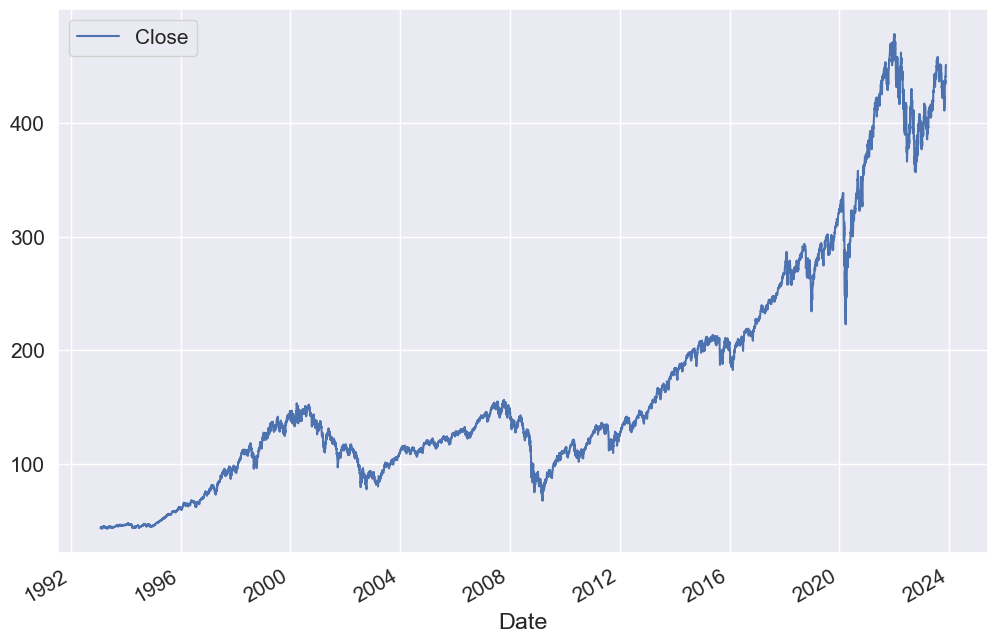

In [95]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc ="upper left",fontsize=15)
plt.show()

In [96]:
spy_roll = spy.rolling(window=10)

In [97]:
spy_roll = spy_roll.mean()

In [98]:
spy_roll

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-11-13,433.082001
2023-11-14,436.135001
2023-11-15,438.837000


In [99]:
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [100]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-11-13,435.190002
2023-11-14,436.309998
2023-11-15,437.089996


In [101]:
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-11-13,440.609985
2023-11-14,448.730011
2023-11-15,449.679993


In [102]:
spy.rolling(window=10,min_periods=5).max().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,45.00000
1993-02-05,45.00000
1993-02-08,45.00000
1993-02-09,45.00000
1993-02-10,45.00000


In [103]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-11-13,440.190002
2023-11-14,448.730011
2023-11-15,449.679993


In [104]:
spy["SMA50"] = spy.Close.rolling(window=50, min_periods=50).mean()

In [105]:
spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2023-11-13,440.190002,432.490800
2023-11-14,448.730011,432.480601
2023-11-15,449.679993,432.549800


In [106]:
spy.head(52)

,Close,SMA50
Date,,
1993-01-29,43.93750,NaN
1993-02-01,44.25000,NaN
1993-02-02,44.34375,NaN
1993-02-03,44.81250,NaN
1993-02-04,45.00000,NaN
1993-02-05,44.96875,NaN
1993-02-08,44.96875,NaN
1993-02-09,44.65625,NaN
1993-02-10,44.71875,NaN


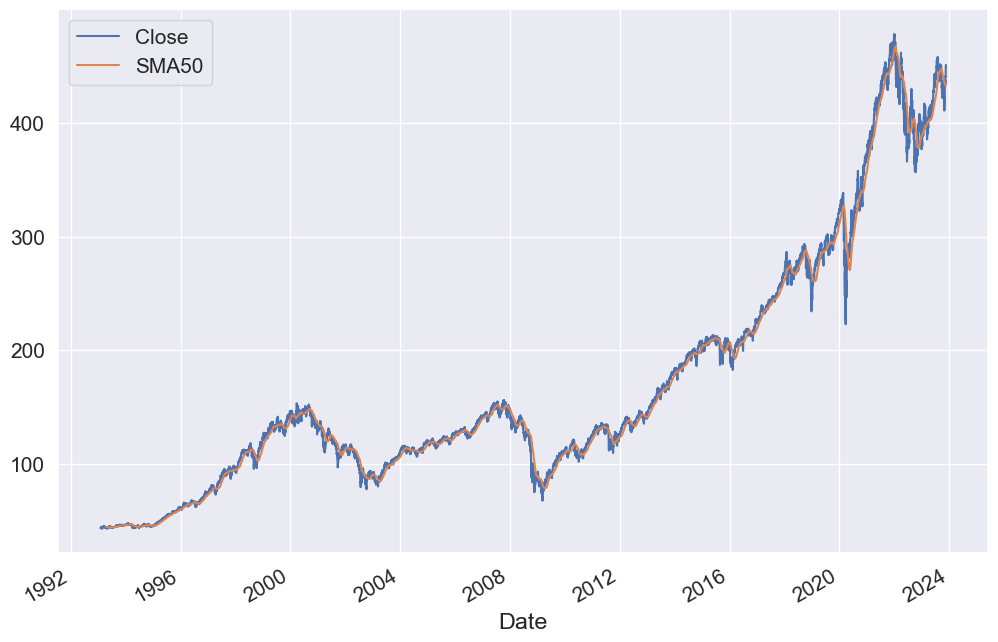

In [107]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc ="upper left",fontsize=15)
plt.show()

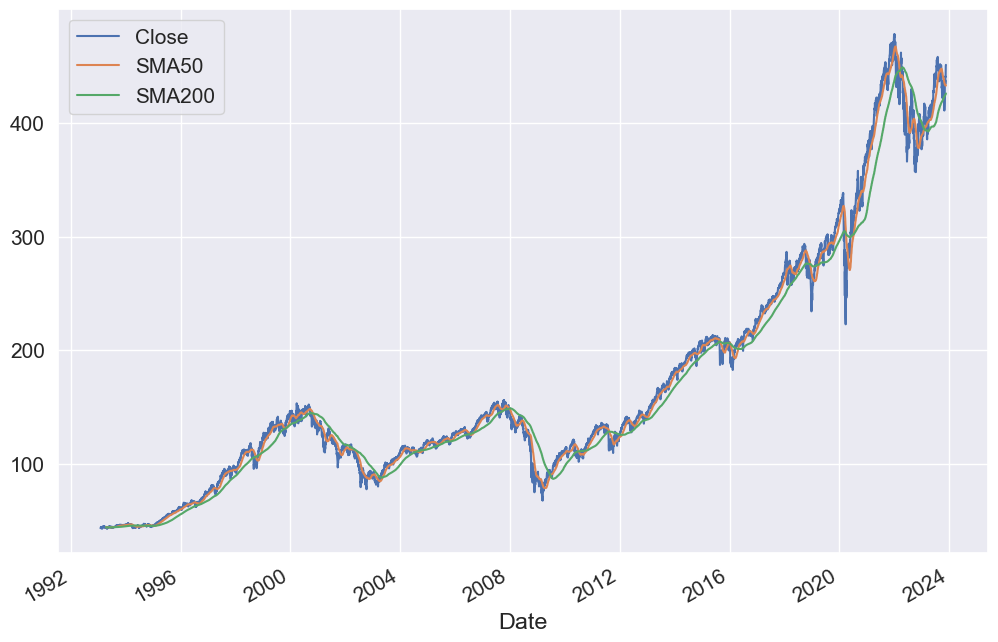

In [108]:
spy["SMA200"] = spy.Close.rolling(window=200, min_periods=50).mean()
spy
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc ="upper left",fontsize=15)
plt.show()

In [109]:
spy["EMA100"] = spy.Close.ewm(span=100,min_periods=100).mean()

In [110]:
spy

,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2023-11-13,440.190002,432.490800,424.840801,432.191914
2023-11-14,448.730011,432.480601,425.081501,432.519401
2023-11-15,449.679993,432.549800,425.297501,432.859214


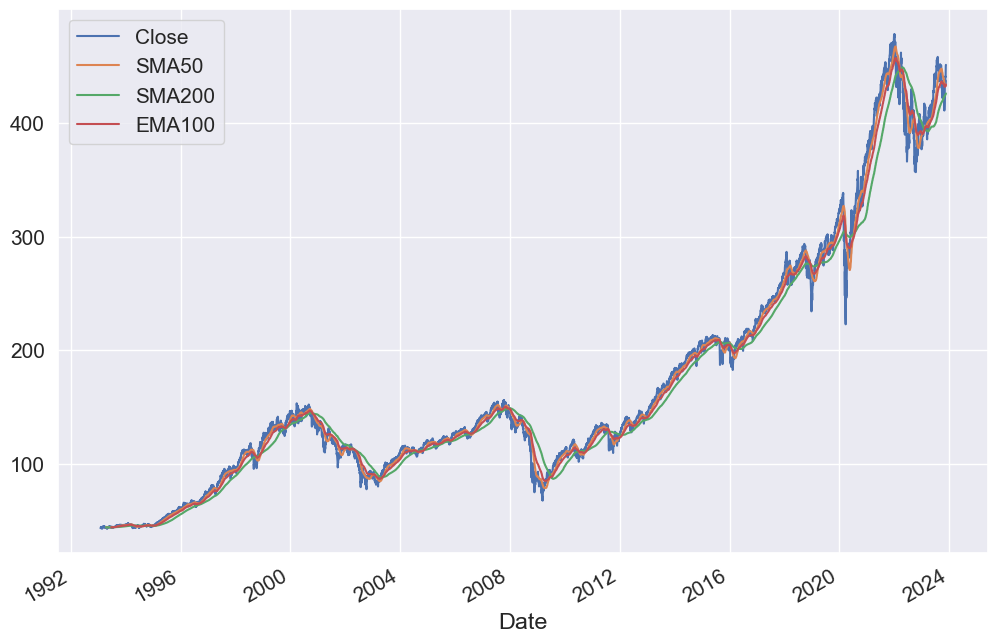

In [111]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc ="upper left",fontsize=15)
plt.show()

In [112]:
spy["Day"] = spy.index.day_name()

In [113]:
spy["Quarter"] = spy.index.quarter

In [114]:
SPY = yf.download("SPY")

[*********************100%%**********************]  1 of 1 completed


In [115]:
spy

,Close,SMA50,SMA200,EMA100,Day,Quarter
Date,,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2023-11-13,440.190002,432.490800,424.840801,432.191914,Monday,4
2023-11-14,448.730011,432.480601,425.081501,432.519401,Tuesday,4
2023-11-15,449.679993,432.549800,425.297501,432.859214,Wednesday,4
